### **Laboratorio 8 - Puesta en producción de un modelo de ML**

Stefano Aragoni, Carol Arévalo, Luis Santos



---------

##### *Contexto*

El mercado inmobiliario en las grandes ciudades brasileñas ha experimentado cambios significativos en los últimos años debido a factores socioeconómicos y de desarrollo urbano. Es vital para las agencias inmobiliarias y los inversores comprender los factores que influyen en el precio del alquiler de viviendas para tomar decisiones informadas.

##### *Objetivo*

Reforzar el aprendizaje en selección de modelos y despliegue de soluciones de Machine Learning utilizando un conjunto de datos sobre alquiler de viviendas en Brasil.

------------    

#### **Parte 1 - Selección de Modelos**

##### *Importar librerías*
Como primer paso, se cargaron todas las librerías necesarias para el desarrollo del laboratorio.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import pickle
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import warnings

# Ignora los warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn.base")

##### *Cargar el Conjunto de Datos*



Posteriormente, se <font color=orange>cargó el conjunto de datos houses_to_rent_v2.csv</font>. Este conjunto de datos contiene información sobre el alquiler de viviendas en Brasil. El objetivo es predecir el precio de alquiler de una vivienda en función de las características de la misma.

Este conjunto de datos contiene las siguientes columnas:

| Campo             | Descripción                                   |
|-------------------|-----------------------------------------------|
| city              | Ciudad de ubicación                           |
| area              | Área en m²                                    |
| rooms             | Número de habitaciones                        |
| bathroom          | Número de baños                               |
| parking spaces    | Número de espacios para parqueo               |
| floor             | Nivel o piso en el que se encuentra           |
| animal            | Si se permiten animales (Sí/No)               |
| furniture         | Si está amueblado (Sí/No)                     |
| hoa $             | Impuesto de la Asociación de Residentes (R$)  |
| rent amount $     | Mensualidad (R$)                              |
| property tax $    | Impuesto sobre bienes inmuebles (R$)          |
| fire insurance $  | Seguro contra incendios (R$)                  |
| total (R$)        | Total de la renta mensual (R$)                |


In [2]:
# Crear un DataFrame con el contenido
df = pd.read_csv('houses_to_rent_v2.csv')
df = df.replace('-', 0)

# Explorar las primeras 10 filas del DataFrame
df.head(10)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
5,São Paulo,376,3,3,7,0,acept,not furnished,0,8000,834,121,8955
6,Rio de Janeiro,72,2,1,0,7,acept,not furnished,740,1900,85,25,2750
7,São Paulo,213,4,4,4,4,acept,not furnished,2254,3223,1735,41,7253
8,São Paulo,152,2,2,1,3,acept,furnished,1000,15000,250,191,16440
9,Rio de Janeiro,35,1,1,0,2,acept,furnished,590,2300,35,30,2955


##### *Análisis Exploratorio de Datos (EDA)*


Como primer paso del análisis exploratorio, se <font color=orange>obtuvo estadísticas descriptivas básicas de las variables del conjunto de datos</font>.

En el análisis de los datos, se observa que las propiedades en el conjunto varían en términos de área, habitaciones y baños. En promedio, las propiedades tienen aproximadamente 149 metros cuadrados de área, alrededor de 2.5 habitaciones y 2.2 baños. Además, la mayoría de las propiedades cuentan con estacionamiento, aunque algunas no lo tienen. Los costos mensuales también varían significativamente, con una mensualidad promedio de alrededor de R$3,896 y un total mensual promedio de R$5,490. 

La distribución de los datos en este conjunto es notablemente asimétrica y con una variabilidad significativa en varias de las características. Por ejemplo, la variable "area" muestra una desviación estándar bastante alta en comparación con la media, lo que indica una amplia dispersión de las áreas de las propiedades. Similarmente, "hoa (R$)" y "property tax (R$)" exhiben una alta variabilidad en relación con sus medias. Esto sugiere que existe una amplia gama de valores en estas variables, con algunos puntos atípicos que tienen valores mucho más altos que la mayoría de las observaciones.

In [3]:
# Estadísticas descriptivas básicas
df['area'] = df['area'].astype(int)
df['rooms'] = df['rooms'].astype(int)
df['bathroom'] = df['bathroom'].astype(int)
df['parking spaces'] = df['parking spaces'].astype(int)
df['floor'] = df['floor'].astype(int)
df['hoa (R$)'] = df['hoa (R$)'].astype(int)
df['rent amount (R$)'] = df['rent amount (R$)'].astype(int)
df['property tax (R$)'] = df['property tax (R$)'].astype(int)
df['fire insurance (R$)'] = df['fire insurance (R$)'].astype(int)
df['total (R$)'] = df['total (R$)'].astype(int)

df.describe()

,area,rooms,bathroom,parking spaces,floor,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
count,10692.000000,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,10692.000000,10692.000000,1.069200e+04
mean,149.217920,2.506079,2.236813,1.609147,5.067995,1.174022e+03,3896.247194,366.704358,53.300879,5.490487e+03
std,537.016942,1.171266,1.407198,1.589521,6.069050,1.559231e+04,3408.545518,3107.832321,47.768031,1.648473e+04
min,11.000000,1.000000,1.000000,0.000000,0.000000,0.000000e+00,450.000000,0.000000,3.000000,4.990000e+02
25%,56.000000,2.000000,1.000000,0.000000,1.000000,1.700000e+02,1530.000000,38.000000,21.000000,2.061750e+03
50%,90.000000,2.000000,2.000000,1.000000,3.000000,5.600000e+02,2661.000000,125.000000,36.000000,3.581500e+03
75%,182.000000,3.000000,3.000000,2.000000,8.000000,1.237500e+03,5000.000000,375.000000,68.000000,6.768000e+03
max,46335.000000,13.000000,10.000000,12.000000,301.000000,1.117000e+06,45000.000000,313700.000000,677.000000,1.120000e+06


Como segundo paso, se realizó una <font color=orange>visualización de la distribución de las variables numéricas del conjunto de datos</font>.

Nuevamente, se puede observar que casas con menos área, habitaciones, baños, y parqueos son más comunes. Asimismo, se puede observar que existen pocas casas varias habitaciones, baños y parqueos. Esto se puede deber a que las casas con estas características son más costosas y por lo tanto menos comunes.

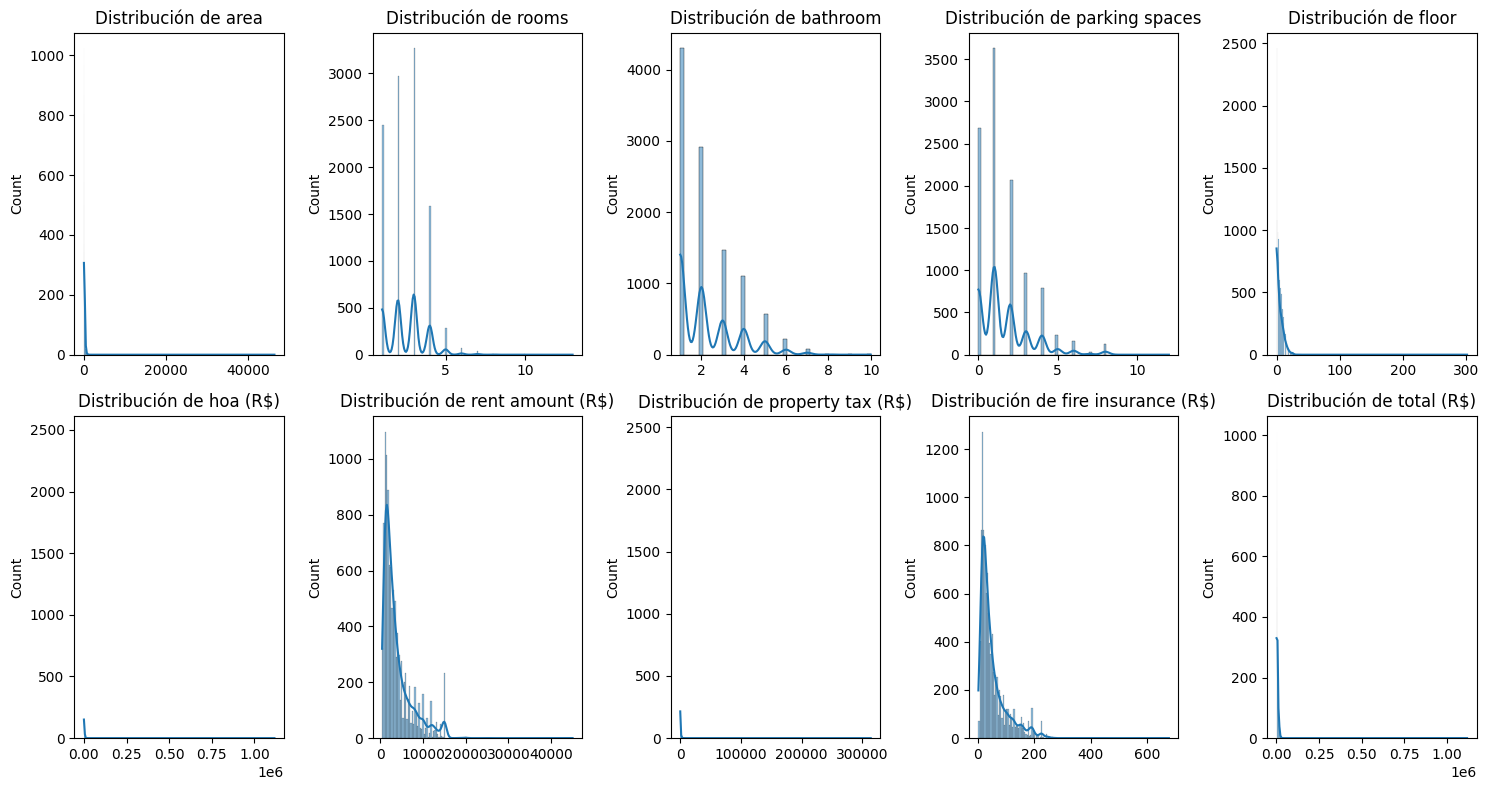

In [4]:
# Variables numéricas
num_vars = df.select_dtypes(include=['float64', 'int64']).columns

fig, axes = plt.subplots(2, 5, figsize=(15, 8))
df_values = df[num_vars].values
columns = df[num_vars].columns

# Iterar a través de las filas y columnas de la cuadrícula
for i in range(2):
    for j in range(5):
        if i * 5 + j < len(num_vars):
            column = columns[i * 5 + j]
            sns.histplot(df_values[:, i * 5 + j], kde=True, ax=axes[i, j])
            axes[i, j].set_title(f'Distribución de {column}')

# Eliminar las celdas vacías si tienes menos de 10 variables numéricas
if len(num_vars) < 10:
    for k in range(len(num_vars), 10):
        fig.delaxes(axes[i, k])

plt.tight_layout()
plt.show()


Como tercer paso, se quiso determinar <font color=orange>si existen valores atípicos en el conjunto de datos</font>. En este caso, sí existen propiedades con precios atípicos. No obstante, se decidió no eliminarlos del conjunto de datos, ya que estos valores atípicos pueden ser de interés para el análisis.

<AxesSubplot: >

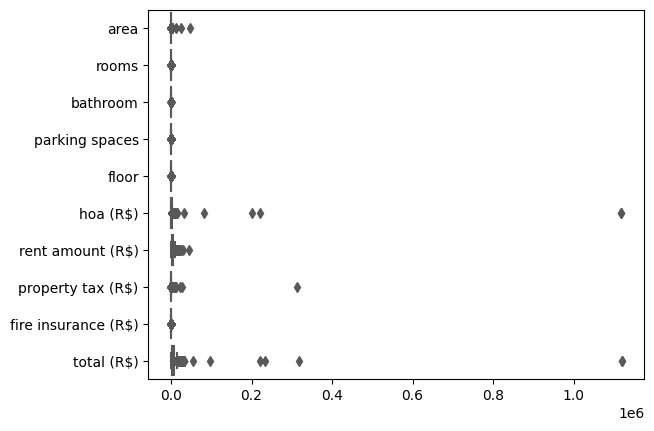

In [5]:
# Ver datos atipicos
sns.boxplot(data=df, orient='h', palette='Set2')

Posteriormente, se quiso <font color=orange>explorar las variables categóricas del conjunto de datos</font>. En este caso, se puede observar que la mayoría de las propiedades se encuentran en São Paulo, y que la mayoría de las propiedades permiten mascotas y no están amuebladas. 

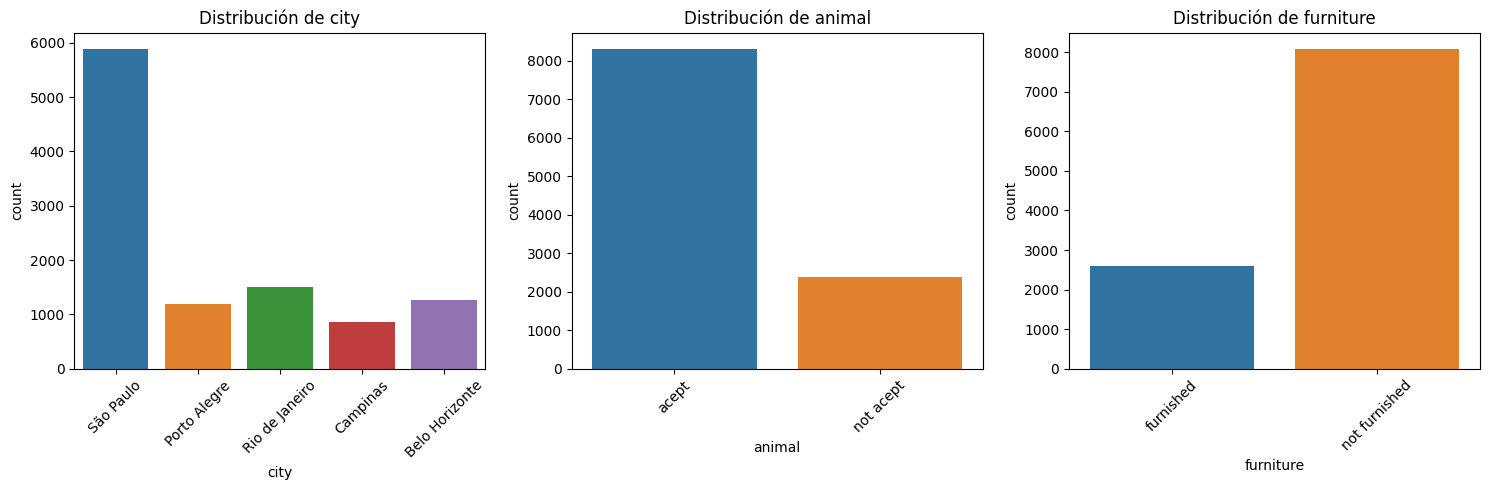

In [6]:
# Variables categóricas
cat_vars = df.select_dtypes(include=['object']).columns

# Configuración de la figura
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Iterar a través de las columnas
for i in range(3):
    column = cat_vars[i]
    sns.countplot(x=column, data=df, ax=axes[i])
    axes[i].set_title(f'Distribución de {column}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


##### *Pre-Procesamiento y Limpieza de Datos*

Como primer paso, se <font color=orange>verificó la existencia valores nulos en el conjunto de datos</font>. Sin embargo, debido a que anteriormente se remplazó "-" por 0 en la columna "floor", no se encontraron valores nulos en el conjunto de datos.

<AxesSubplot: >

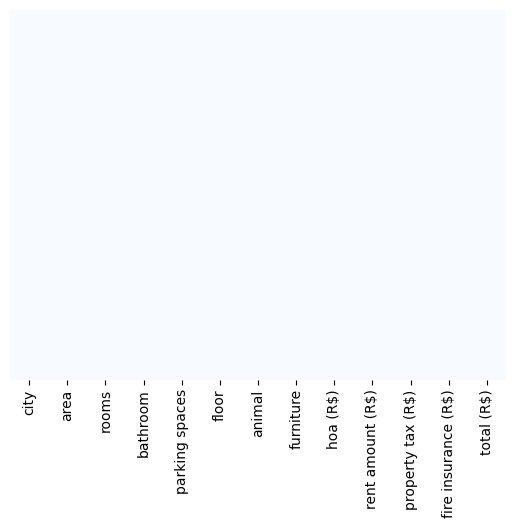

In [7]:
# Verificación de valores nulos
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

Sin embargo, para poder entrenar al modelo sí es necesario que todas las variables tengan valores numéricos. Por lo tanto, se <font color=orange>convirtieron las variables categóricas "city", "animal" y "furniture" en variables numéricas</font>.

In [8]:
# Asignar codigos
label_encoder = LabelEncoder()
df['city'] = label_encoder.fit_transform(df['city'])
for i in range(len(label_encoder.classes_)):
    print(f'{label_encoder.classes_[i]}: {i}')

print("\n------")

label_encoder2 = LabelEncoder()
df['animal'] = label_encoder2.fit_transform(df['animal'])
for i in range(len(label_encoder2.classes_)):
    print(f'{label_encoder2.classes_[i]}: {i}')

print("\n------")

label_encoder3 = LabelEncoder()
df['furniture'] = label_encoder3.fit_transform(df['furniture'])
for i in range(len(label_encoder3.classes_)):
    print(f'{label_encoder3.classes_[i]}: {i}')

print("\n------")

# Verificar que se hayan asignado los codigos
df.head(10)

Belo Horizonte: 0
Campinas: 1
Porto Alegre: 2
Rio de Janeiro: 3
São Paulo: 4

------
acept: 0
not acept: 1

------
furnished: 0
not furnished: 1

------


,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,4,70,2,1,1,7,0,0,2065,3300,211,42,5618
1,4,320,4,4,0,20,0,1,1200,4960,1750,63,7973
2,2,80,1,1,1,6,0,1,1000,2800,0,41,3841
3,2,51,2,1,0,2,0,1,270,1112,22,17,1421
4,4,25,1,1,0,1,1,1,0,800,25,11,836
5,4,376,3,3,7,0,0,1,0,8000,834,121,8955
6,3,72,2,1,0,7,0,1,740,1900,85,25,2750
7,4,213,4,4,4,4,0,1,2254,3223,1735,41,7253
8,4,152,2,2,1,3,0,0,1000,15000,250,191,16440
9,3,35,1,1,0,2,0,0,590,2300,35,30,2955


Con las variables categóricas convertidas, se <font color=orange>determinó la correlación entre las variables del conjunto de datos</font>. Esto es parte del ***análisis exploratorio de datos***


En este caso, se puede observar que la mensualidad neta tiene la mayor correlación con las variables relacionadas con las características del inmueble. Por otro lado, la mensualidad neta tiene alta correlación con las variables relacionadas con los impuestos y el seguro contra incendios. Esto es de esperarse, ya que los impuestos y el seguro contra incendios son costos adicionales que se suman a la mensualidad neta.

<AxesSubplot: >

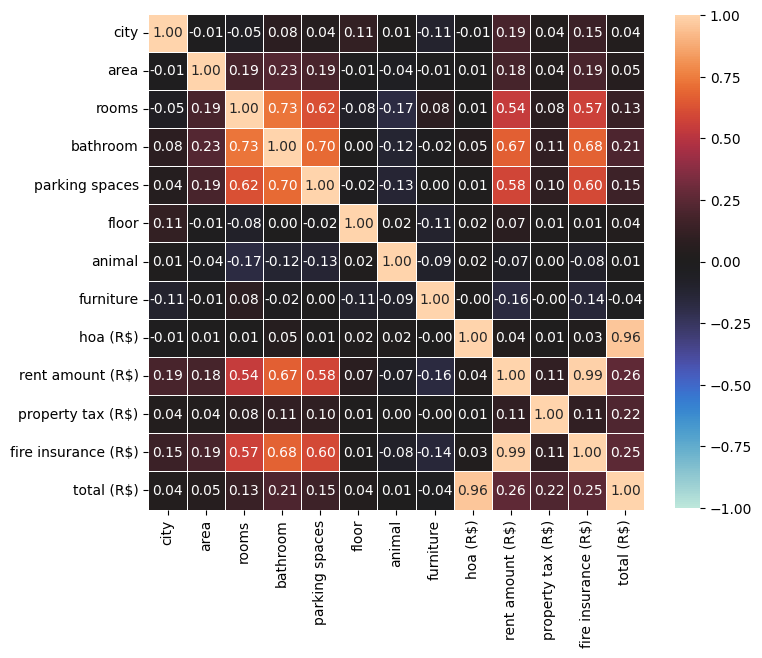

In [9]:
# Verificar correlación
corr = df.corr()

# Configuración de la figura
fig, ax = plt.subplots(figsize=(8, 8))

# Mapa de calor
sns.heatmap(corr, annot=True, fmt='.2f',
            cbar_kws={'shrink': .8}, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar=True)

Con los datos limpios, se procedió a <font color=orange>dividir el conjunto de datos en 80% para entrenamiento y 20% para prueba</font>

In [10]:
# Dividir los datos en un 80% para entrenamiento y 20% para pruebas

X_entreno, X_prueba, y_entreno, y_prueba = train_test_split(df.drop('total (R$)', axis=1), df['total (R$)'], test_size=0.2, random_state=42)

##### *Entrenamiento de Modelos*

Después del pre-procesamiento y limpieza de datos, se procedió a <font color=orange>entrenar modelos de regresión</font>. Para esto, se utilizó el conjunto de datos de entrenamiento y se utilizó la variable "total (R$)" como variable objetivo.

Algunos de los modelos entrenados fueron:
- Regresión Lineal
- Regresión Ridge
- Regresión Lasso
- Random Forest
- Arboles de Decisión
- KNN Regressor
- Gradient Boosting Regressor

Asimismo, se utilizó **GridSearchCV** para encontrar los mejores parámetros de cada modelo entrenado. 

In [11]:
# Definir los hiperparámetros a ajustar para cada modelo
parametros_grid_regresion_lineal = {'fit_intercept': [True, False]}
parametros_grid_random_forest = {'n_estimators': [10, 50, 100], 'max_depth': [10, 20, 30]}
parametros_grid_arbol_decision = {'max_depth': [10, 20, 30]}
parametros_grid_ridge = {'alpha': [0.1, 1, 10]}
parametros_grid_lasso = {'alpha': [0.1, 1, 10]}
parametros_grid_gradient_boosting = {'n_estimators': [10, 50, 100], 'max_depth': [10, 20, 30]}
parametros_grid_knn = {'n_neighbors': [3, 5, 7]}

# Crear diccionario de modelos con sus respectivos hiperparámetros
modelos_con_parametros = {
    "Regresión Lineal": (LinearRegression(), parametros_grid_regresion_lineal),
    "Random Forest": (RandomForestRegressor(), parametros_grid_random_forest),
    "Árbol de Decisión": (DecisionTreeRegressor(), parametros_grid_arbol_decision),
    "Ridge": (Ridge(), parametros_grid_ridge),
    "Lasso": (Lasso(), parametros_grid_lasso),
    "KNN": (KNeighborsRegressor(), parametros_grid_knn),
    "Gradient Boosting": (GradientBoostingRegressor(), parametros_grid_gradient_boosting)
}

mejores_modelos = {}

# Realizar Grid Search para cada modelo
for nombre, (modelo, parametros) in modelos_con_parametros.items():
    print(f'Entrenando {nombre}')

    grid_search = GridSearchCV(modelo, parametros, scoring='neg_mean_squared_error', cv=5)
    grid_search.fit(X_entreno, y_entreno)
    
    mejor_modelo = grid_search.best_estimator_
    mejores_modelos[nombre] = mejor_modelo

# Evaluar los mejores modelos en el conjunto de prueba
rmse_resultados_mejores = {}

for nombre, mejor_modelo in mejores_modelos.items():
    y_pred = mejor_modelo.predict(X_prueba)
    rmse = np.sqrt(mean_squared_error(y_prueba, y_pred))
    rmse_resultados_mejores[nombre] = rmse


Entrenando Regresión Lineal
Entrenando Random Forest
Entrenando Árbol de Decisión
Entrenando Ridge
Entrenando Lasso
Entrenando KNN
Entrenando Gradient Boosting


##### *Selección de Modelo*

Posterior al entrenamiento, se <font color=orange>desplegaron los mejores modelos en función del RMSE</font>.

In [12]:
resultados_df = pd.DataFrame({
    'Modelo': list(rmse_resultados_mejores.keys()),
    'RMSE': list(rmse_resultados_mejores.values())
})

# Ordenar el DataFrame por RMSE en orden ascendente
resultados_df = resultados_df.sort_values(by='RMSE')

# Mostrar la tabla de los mejores modelos
print(resultados_df)

              Modelo        RMSE
4              Lasso    1.037798
0   Regresión Lineal    1.038122
3              Ridge    1.039987
5                KNN  248.974385
6  Gradient Boosting  316.190157
1      Random Forest  469.155621
2  Árbol de Decisión  766.579052


Según lo anteriormente presentado, se procedió a <font color=orange>seleccionar el mejor modelo</font>. En este caso, como se puede observar, el mejor modelo es <font color=skyblue> ***Regresión Lasso*** </font>. Esto debido a que tiene el RMSE más bajo de todos los modelos generados. 


- El modelo de **Regresión Lasso** combina la Regresión Lineal con la regularización L1, que suma los valores absolutos de los coeficientes del modelo a la función de costo. Lo más destacado del Lasso es su capacidad para realizar selección automática de características al poner en cero algunos coeficientes, lo que es útil cuando se sospecha que algunas características son irrelevantes o redundantes. La intensidad de la regularización se controla mediante el hiperparámetro "alpha", y un valor más alto de alpha resulta en una mayor tendencia a reducir los coeficientes hacia cero y a realizar selección de características. El Lasso es eficaz para simplificar modelos de regresión y tratar la multicolinealidad, aunque es importante elegir alpha adecuadamente para evitar el subajuste o sobreajuste.

Para poder utilizarlo con FLASK, se <font color=orange>guardó el modelo en un archivo .pkl</font>. Esto permite almacenar el modelo y utilizarlo en el despliegue de la aplicación.

In [17]:
# Guardar el modelo
with open('mejor_modelo.pkl', 'wb') as archivo_salida:
    pickle.dump(mejores_modelos['Lasso'], archivo_salida)

##### *Interpretación de resultados y métricas*

Finalmente, se <font color=orange>analizó los resultados y métricas de desempeño del modelo</font>. 




En este caso, se ha calculado un <font color=skyblue>RMSE de 1.037</font>. Es importante destacar que el rango de los valores a predecir varía desde un mínimo de 4.990000e+02 hasta un máximo de 1.120000e+06. Dado que el RMSE es considerablemente bajo en comparación con este amplio rango de valores objetivo, podemos concluir que el modelo se ajusta muy bien a los datos y presenta una alta capacidad predictiva. 

El bajo RMSE indica que las predicciones del modelo están muy cerca de los valores reales en términos de las unidades en las que se expresan, lo que sugiere una gran precisión en las predicciones.

In [18]:
# Imprimir RMSE del mejor modelo
print(f"RMSE del mejor modelo (Lasso): {rmse_resultados_mejores['Lasso']}")

RMSE del mejor modelo (Lasso): 1.0377979318457655


El coeficiente de determinación R^2, por otro lado, es una métrica utilizada para explicar y predecir las variaciones en los datos. El valor de R^2 está en el rango de 0 a 1, donde:
- R^2 = 0 indica que el modelo no explica ninguna variación en los datos, lo que significa que el modelo no es útil para hacer predicciones.
- R^2 = 1 indica que el modelo explica la variación total en los datos, lo que significa que el modelo se ajusta perfectamente a los datos.

En este caso, se ha obtenido un valor de <font color=skyblue>R^2 de 0.9999999459385837</font>; el cual está muy cerca de 1. En otras palabras, modelo Lasso es altamente preciso para predecir los valores de la variable objetivo.

In [19]:
# Imprimir R^2 del mejor modelo
print(f"R^2 del mejor modelo (Lasso): {mejores_modelos['Lasso'].score(X_prueba, y_prueba)}")

R^2 del mejor modelo (Lasso): 0.9999999459385837


Con esto en mente, se puede tener certeza que el mejor modelo es capaz de predecir una renta de forma precisa. 

Por ejemplo:
- Al tener una propiedad (proveniente del conjunto de prueba) con ciertas características, se puede observar que este modelo puede predecir con casi 0% de error el total de la renta de la propiedad. <font color=lightgreen>Esto significa que el modelo aprendió de forma correcta las características de las propiedades y su relación con el total de la renta</font>.

In [20]:
# Seleccionar un registro de prueba aleatorio
indice = np.random.randint(0, len(X_prueba))
registro = X_prueba.iloc[indice]
print(f"Características de Propiedad: Ciudad {registro['city']}, Área {registro['area']}, Habitaciones {registro['rooms']}, Baños {registro['bathroom']}, Estacionamientos {registro['parking spaces']}, Piso {registro['floor']}, Animal {registro['animal']}, Muebles {registro['furniture']}, HOA {registro['hoa (R$)']}, Alquiler {registro['rent amount (R$)']}, Impuesto a la propiedad {registro['property tax (R$)']}, Seguro contra incendios {registro['fire insurance (R$)']}")
print(f"Total Renta (Teórico): {y_prueba.iloc[indice]}")

# Cargar el modelo
with open('mejor_modelo.pkl', 'rb') as archivo_entrada:
    mejor_modelo = pickle.load(archivo_entrada)

# Predecir el valor de la renta
valor_renta = mejor_modelo.predict(registro.values.reshape(1, -1))
print(f"\nPredicción de Total Renta (LASSO): {valor_renta[0]}")

# Imprimir error %
print(f"\nError %: {abs(valor_renta[0] - y_prueba.iloc[indice]) / y_prueba.iloc[indice] * 100}")

Características de Propiedad: Ciudad 4, Área 70, Habitaciones 2, Baños 2, Estacionamientos 0, Piso 0, Animal 0, Muebles 1, HOA 0, Alquiler 1880, Impuesto a la propiedad 0, Seguro contra incendios 29
Total Renta (Teórico): 1909

Predicción de Total Renta (LASSO): 1909.1676516545217

Error %: 0.008782171530733655


-------------

#### **Parte 2 - Aplicación interactiva**

- Funcionalidad para cargar datos y realizar predicciones: 20 puntos.
- Diseño y usabilidad de la interfaz: 15 puntos.
- Incorporación y claridad de visualizaciones: 20 puntos.

Todo esto se puede observar en el archivo app.py

-------------

#### **Parte 3 - Reflexión**

- Desafíos y aprendizajes durante la puesta en producción de modelos de Machine Learning.

Durante la producción de modelos de Machine Learning, se intentó implementar nuevamente la herramienta de AutoGluon. Esta herramienta se presenta como un recurso intuitivo y accesible, el cual facilita el desarrollo de modelos. Asimismo, permite que cualquiera desarrolle modelos sin requerir un profundo conocimiento técnico previo. 

Sin embargo, cabe destacar que AutoGluon no nos presentó resultados promotedores. En realidad, la mayoría de modelos que se generaron con AutoGluon presentaron un RMSE muy alto (2,000+). Esto se puede deber a que AutoGluon no permite modificar los hiperparámetros de los modelos, lo cual puede afectar el desempeño de los modelos. Asimismo, debido a que AutoGluon no funciona de forma correcta en nuestras computadoras, se tuvo que utilizar Google Colab. Esta herramienta de Google es una útil, sin embargo, preferimos utilizar nuestro propio equipo para desarrollar los modelos.

Por tal motivo, tuvimos que desarrollar un algoritmo que permitiera entrenar varios modelos con diferentes hiperparámetros. Esto permitió obtener un modelo con un RMSE mucho más bajo que los modelos generados con AutoGluon. En realidad, el mejor modelo encontrado tuvo un RMSE de 1.03 y un R^2 de 0.9999, y no tomó mucho tiempo en entrenarse. Asimismo, logramos ejecutar el algoritmo en nuestra computadora, lo cual nos permitió ahorrar tiempo y recursos.

Una de las mayores lecciones que nos dejó este laboratorio fue que lo fácil no siempre es lo mejor. Aunque AutoGluon es una herramienta intuitiva y fácil de utilizar, logramos determinar que nuestro algoritmo fue capaz de entrenar varios modelos con diferentes hiperparámetros en un tiempo mucho menor y con un mejor desempeño. Esto posiblemente debido a que AutoGluon no permite modificar los hiperparámetros de los modelos, lo cual puede afectar el desempeño de los modelos.

Finalmente, este laboratorio nos permitió terminar de comprender cómo utilizar Flask para desplegar modelos de Machine Learning. Aunque ya habíamos utilizado Flask en cursos anteriores, este laboratorio nos permitió comprender cómo utilizar Flask para desplegar modelos de Machine Learning. 

- Lo que les ha gustado y no les ha gustado de lo que han visto y practicado en la última semana.

Algo que nos gustó de este laboratorio es que nos permitió utilizar Flask para desplegar modelos de Machine Learning. Anteriormente, en el curso de Inteligencia Artificial y Minería de Datos, desarrollamos modelos de ML pero nunca los desplegamos. 

Creemos que esto es especialmente útil debido a que los modelos no viven permanentemente en Jupyter Notebooks; estos normalmente son desplegados en páginas web. Esto permite que los modelos sean utilizados por cualquier persona, sin necesidad de que sepan programar o utilizar Jupyter Notebooks.

In [ ]:
# imagen donde se vea la pagina web con el modelo desplegado funcionando

#TODO

Algo que no nos gustó mucho fue la utilización de AutoGluon. Como se mencionó anteriormente, esta herramienta no funciona correctamente en las computadoras de dos de los integrantes de este equipo. Por lo tanto, tuvimos que utilizar Google Colab para poder utilizar AutoGluon. Esto nos tomó mucho tiempo, ya que tuvimos que preparar el entorno de trabajo en Google Colab (lo cual conllevó instalar varias librerías) y tuvimos que cargar el conjunto de datos en Google Drive.

A pesar de este trabajo, al final AutoGluon no nos presentó buenos resultados. Por tal motivo, se tuvo que desarrollar un algoritmo personalizado que permitiera entrenar varios modelos con diferentes hiperparámetros.